In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
import math

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [2]:
#for c in range(df.shape[1]):
#    df.columns[c] = df.columns[c].strip()
    

#df.columns[3] = 'Life expectancy'
#[x.title().strip() for x in df.columns]

df = df.rename(str.strip, axis='columns')
df = df.rename(str.lower, axis='columns')

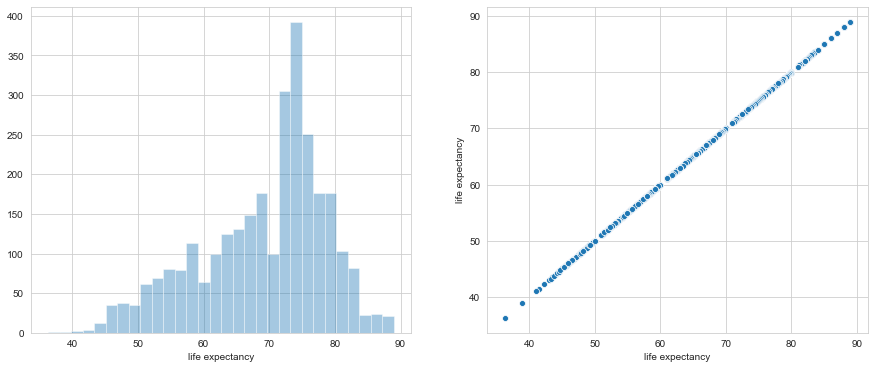

In [17]:
def explore(var):
    plt.figure(figsize=(15,6))

    plt.subplot(1,2,1)
    sns.distplot(df[var].dropna(), kde=False)

    plt.subplot(1,2,2)
    sns.scatterplot(df['life expectancy'], df[var])

    plt.show()

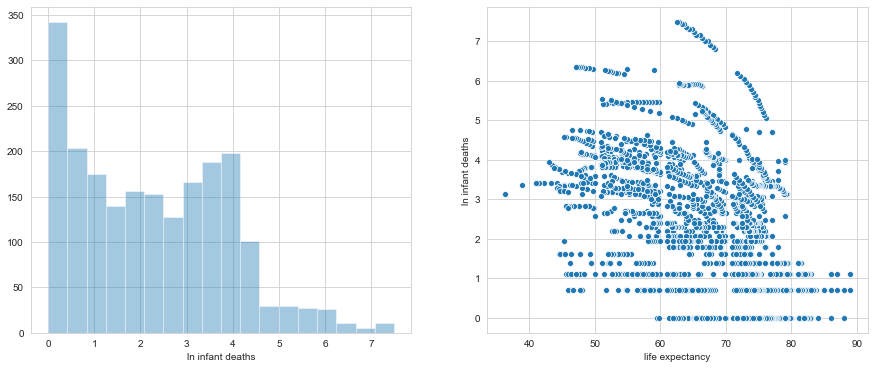

In [21]:
def make_log(var, keepzeroes=False):
    count=0
    newvar = 'ln ' + var
    for i in range(len(df)):
        if df.loc[i,var] == 0:
            if keepzeroes:
                count += 1
                df.loc[i,newvar] = .001
            else:
                count += 1
                df.loc[i,newvar] = None
        else:
            df.loc[i, newvar] = math.log(float(df.loc[i,var]))

make_log('infant deaths')
explore('ln infant deaths')

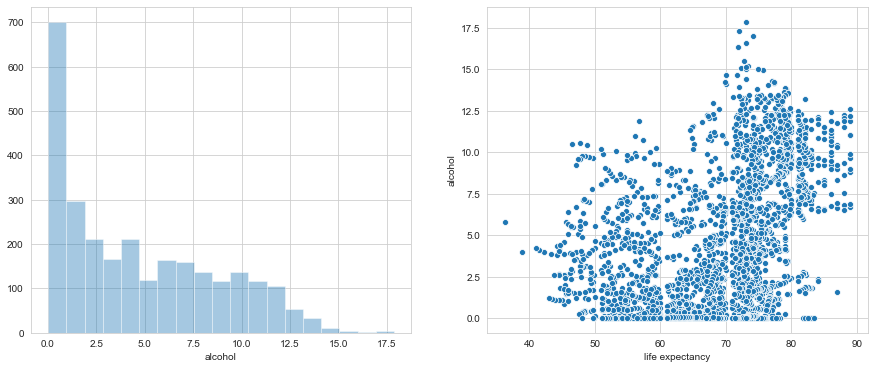

In [30]:
explore('alcohol')

Zero values: 0


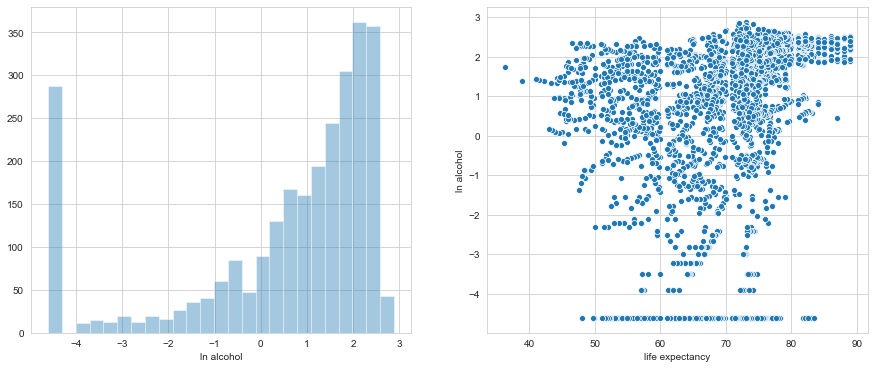

In [31]:
make_log('alcohol')

explore('ln alcohol')

0


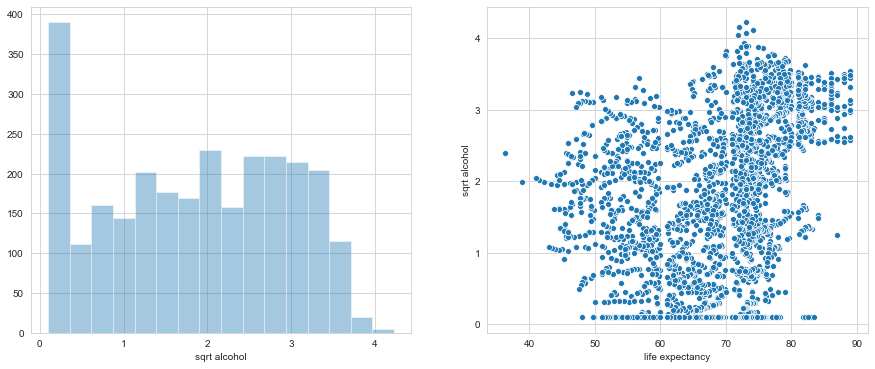

In [32]:
count=0
for i in range(len(df)):
    if df.loc[i,'alcohol'] < 0:
        count += 1
        df.loc[i,'sqrt alcohol'] = -math.sqrt(abs(df.loc[i,'alcohol']))
    else:
        df.loc[i,'sqrt alcohol'] = math.sqrt(float(df.loc[i,'alcohol']))
        
print(count)

explore('sqrt alcohol')

//anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1038: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


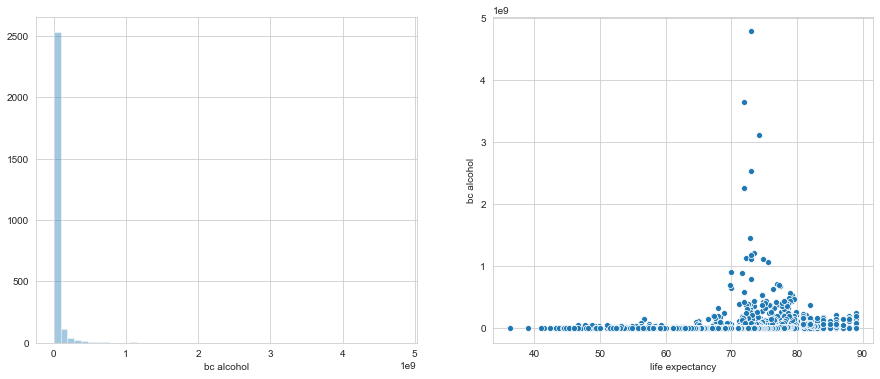

In [71]:
from scipy.stats import boxcox

bc_alcohol,_ = boxcox(df['alcohol'])
df['bc alcohol'] = bc_alcohol

explore('bc alcohol')


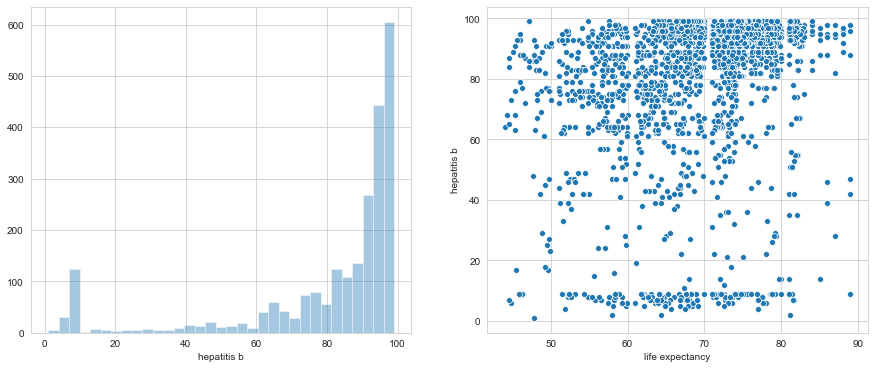

In [33]:
explore('hepatitis b')

In [34]:
max(df['hepatitis b'])

99.0

It's difficult to provide intuition for that result. It looks like the variable is topcoded at 99, which would make sense if the variable is a percentage, but 99% of a country having Hepatitis B seems absurd.

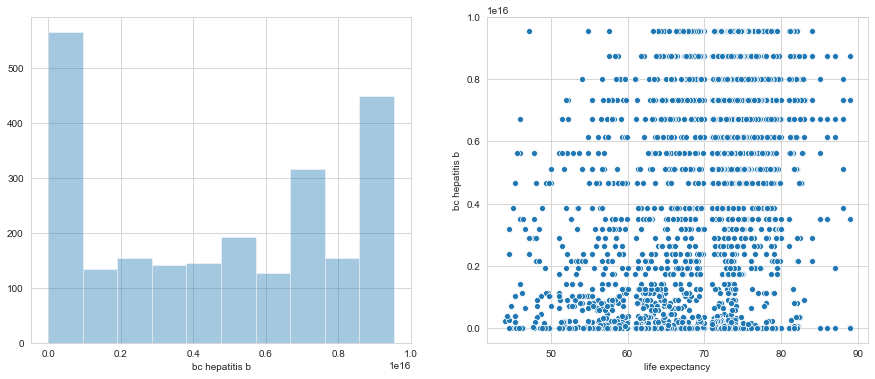

In [73]:
df['bc hepatitis b'],_ = boxcox(df['hepatitis b'])
explore('bc hepatitis b')

Zero values: 785


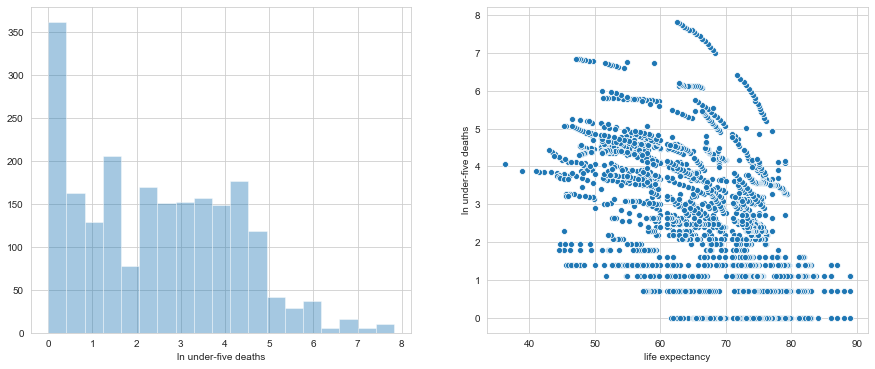

In [38]:
make_log('under-five deaths')

explore('ln under-five deaths')

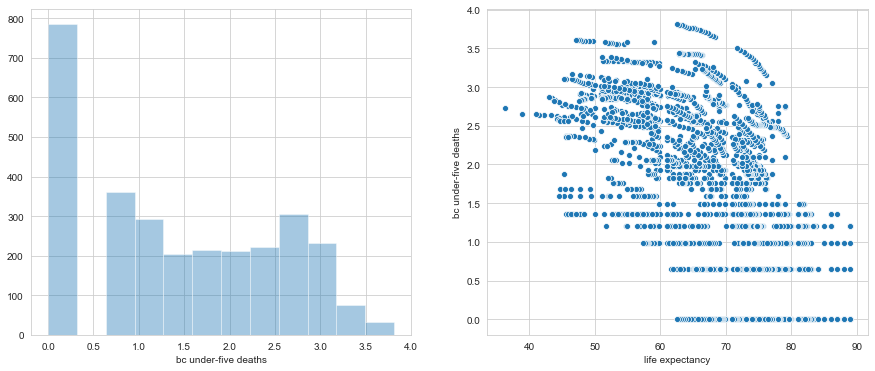

In [75]:
df['bc under-five deaths'],_ = boxcox(df['under-five deaths']+1)
explore('bc under-five deaths')

In [1]:
explore('hiv/aids')

NameError: name 'explore' is not defined

Zero values: 0


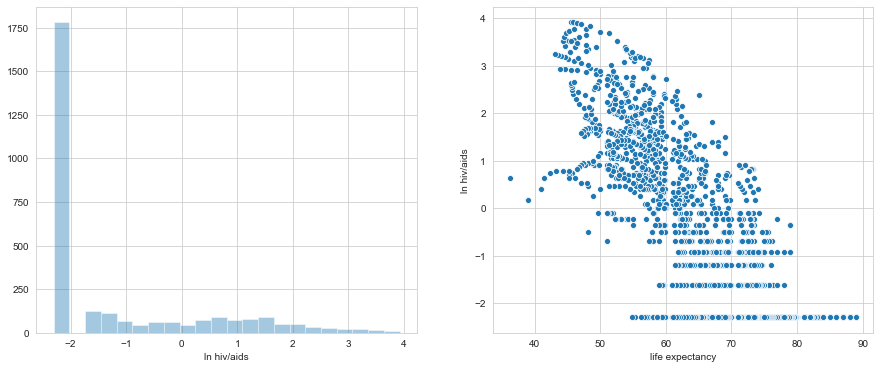

In [45]:
make_log('hiv/aids')
explore('ln hiv/aids')

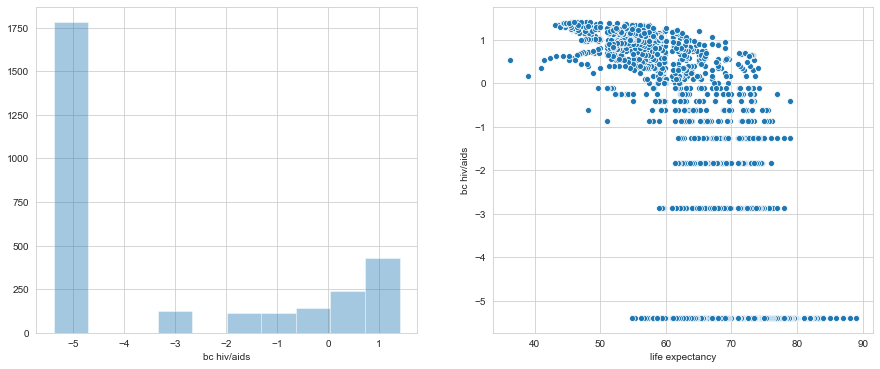

In [76]:
df['bc hiv/aids'],_ = boxcox(df['hiv/aids'])
explore('bc hiv/aids')